In [1]:
import os
os.chdir("../../../../")

import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scripts.python.tsa.utsmodel import *
from scripts.python.tsa.ts_utils import *
from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

## SARIMAX (unscaled)

,date,total,american_samoa,australia,europe,new_zealand,usa,other_countries,cruise_ships,stringency_index,covid,samoa_flights,samoa_hotel,samoa_travel
0,2002-08-01,8260.0,2877.0,1115.0,429.0,2035.0,933.0,871.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2002-09-01,6708.0,2119.0,972.0,372.0,1879.0,612.0,754.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002-10-01,5737.0,1892.0,737.0,468.0,1492.0,577.0,571.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2002-11-01,6653.0,2530.0,864.0,393.0,1675.0,483.0,708.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2002-12-01,13042.0,4678.0,1918.0,272.0,4401.0,1007.0,766.0,0.0,0.0,0.0,0.0,0.0,0.0


training size : 242, testing size : 0
THE BENCHMARK EVALUATION FOR TOTAL 

STARTED TO CONDUCT STEPWISE SEARCHING FOR TOTAL 

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  242
Model:             SARIMAX(2, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -2140.742
Date:                            Wed, 14 Jun 2023   AIC                           4297.484
Time:                                    23:02:45   BIC                           4325.362
Sample:                                         0   HQIC                          4308.715
                                            - 242                                         
Covariance Type:                              opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

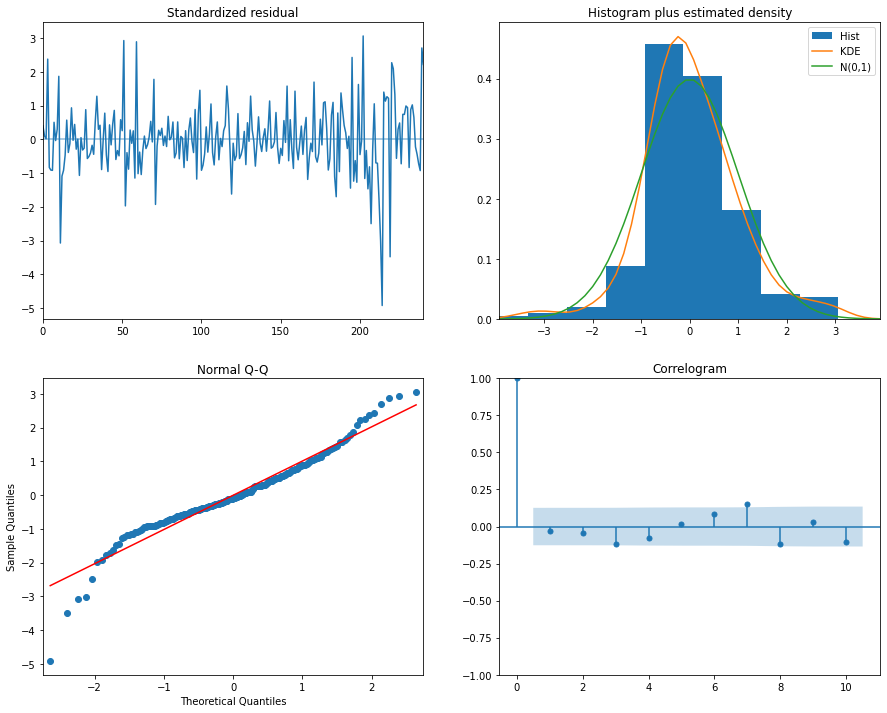

STARTED TO CONDUCT GRID SEARCHING FOR TOTAL 

LU decomposition error.
STARTED TO CONDUCT CROSS-VALIDATION FOR TOTAL 

Best Models from Cross-validation is  ARIMA(1,0,2)(1,1,1)[12] intercept 



In [2]:
from sarimaxs import run_sarimax
samoa_original = run_sarimax(country="samoa", 
                             y_vars=["total"], 
                             exog_var=["covid", "stringency_index", "samoa_travel"],
                             method=None)

In [3]:
calculate_evaluation(samoa_original["total"], samoa_original["total_pred"])

{'MSE': 4104715.8848557104,
 'RMSE': 2026.0098432277446,
 'MAE': 1287.9738531206633,
 'SMAPE': 36.454329718575856}

## Withhold Exogenous Variables

,date,total,american_samoa,australia,europe,new_zealand,usa,other_countries,cruise_ships,stringency_index,covid,samoa_flights,samoa_hotel,samoa_travel
0,2002-08-01,8260.0,2877.0,1115.0,429.0,2035.0,933.0,871.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2002-09-01,6708.0,2119.0,972.0,372.0,1879.0,612.0,754.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002-10-01,5737.0,1892.0,737.0,468.0,1492.0,577.0,571.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2002-11-01,6653.0,2530.0,864.0,393.0,1675.0,483.0,708.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2002-12-01,13042.0,4678.0,1918.0,272.0,4401.0,1007.0,766.0,0.0,0.0,0.0,0.0,0.0,0.0


training size : 242, testing size : 0
THE BENCHMARK EVALUATION FOR TOTAL 

STARTED TO CONDUCT STEPWISE SEARCHING FOR TOTAL 

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  242
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -345.847
Date:                            Wed, 14 Jun 2023   AIC                            703.695
Time:                                    23:11:11   BIC                            724.604
Sample:                                         0   HQIC                           712.119
                                            - 242                                         
Covariance Type:                              opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

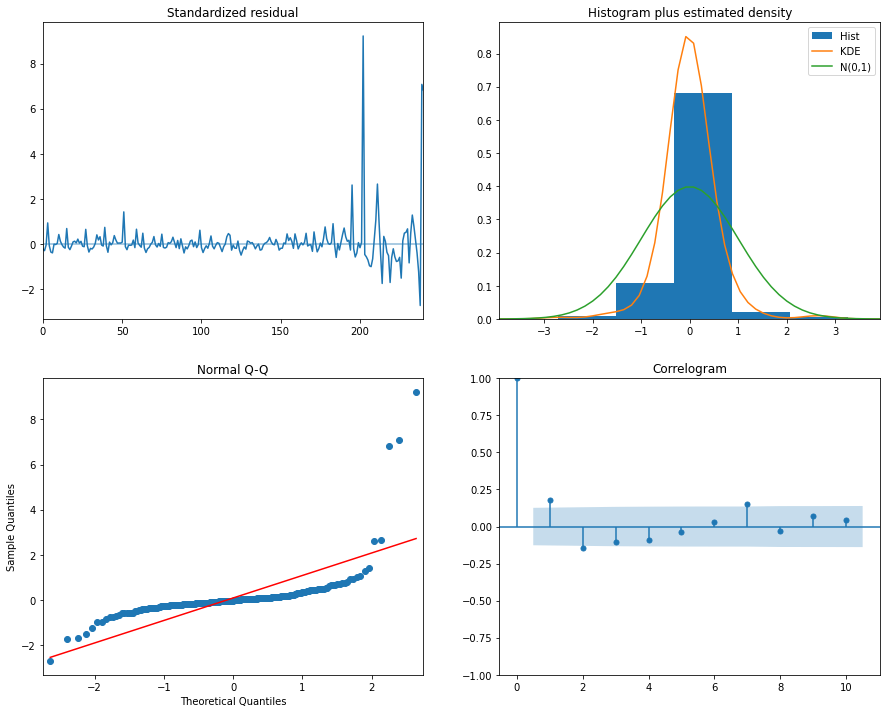

STARTED TO CONDUCT GRID SEARCHING FOR TOTAL 

STARTED TO CONDUCT CROSS-VALIDATION FOR TOTAL 

Best Models from Cross-validation is  ARIMA(2,1,1)(0,1,1)[12] intercept 



In [5]:
samoa_no_gt = run_sarimax(country="samoa", y_vars=["total"], method="scaledlogit",
                          exog_var=["covid", "stringency_index"])

In [7]:
calculate_evaluation(samoa_no_gt["total"], samoa_no_gt["total_pred"])

{'MSE': 2932561.9571909965,
 'RMSE': 1712.4724690315452,
 'MAE': 1023.771456273452,
 'SMAPE': 33.613811052678486}

## SARIMAX (departure country level)

,date,total,american_samoa,australia,europe,new_zealand,usa,other_countries,cruise_ships,stringency_index,covid,samoa_flights,samoa_hotel,samoa_travel
0,2002-08-01,8260.0,2877.0,1115.0,429.0,2035.0,933.0,871.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2002-09-01,6708.0,2119.0,972.0,372.0,1879.0,612.0,754.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002-10-01,5737.0,1892.0,737.0,468.0,1492.0,577.0,571.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2002-11-01,6653.0,2530.0,864.0,393.0,1675.0,483.0,708.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2002-12-01,13042.0,4678.0,1918.0,272.0,4401.0,1007.0,766.0,0.0,0.0,0.0,0.0,0.0,0.0


training size : 242, testing size : 0
THE BENCHMARK EVALUATION FOR AMERICAN_SAMOA 

STARTED TO CONDUCT STEPWISE SEARCHING FOR AMERICAN_SAMOA 

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  242
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -274.044
Date:                            Sat, 10 Jun 2023   AIC                            564.089
Time:                                    01:16:09   BIC                            591.967
Sample:                                         0   HQIC                           575.320
                                            - 242                                         
Covariance Type:                              opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

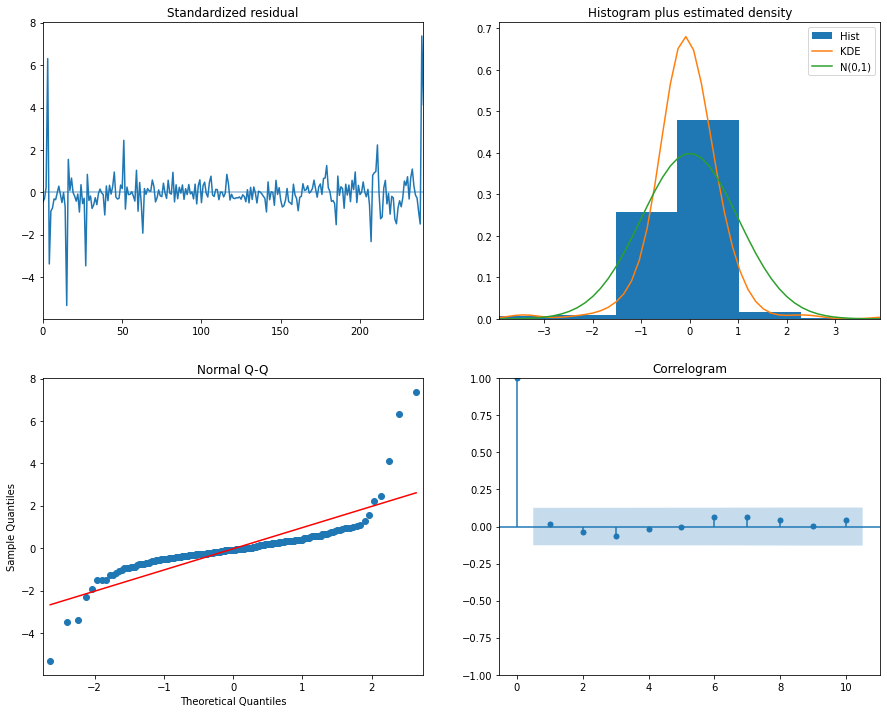

STARTED TO CONDUCT GRID SEARCHING FOR AMERICAN_SAMOA 

STARTED TO CONDUCT CROSS-VALIDATION FOR AMERICAN_SAMOA 

Best Models from Cross-validation is  ARIMA(1,0,0)(1,1,1)[12] intercept 



,date,total,american_samoa,australia,europe,new_zealand,usa,other_countries,cruise_ships,stringency_index,covid,samoa_flights,samoa_hotel,samoa_travel
0,2002-08-01,8260.0,2877.0,1115.0,429.0,2035.0,933.0,871.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2002-09-01,6708.0,2119.0,972.0,372.0,1879.0,612.0,754.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002-10-01,5737.0,1892.0,737.0,468.0,1492.0,577.0,571.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2002-11-01,6653.0,2530.0,864.0,393.0,1675.0,483.0,708.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2002-12-01,13042.0,4678.0,1918.0,272.0,4401.0,1007.0,766.0,0.0,0.0,0.0,0.0,0.0,0.0


training size : 242, testing size : 0
THE BENCHMARK EVALUATION FOR AUSTRALIA 

STARTED TO CONDUCT STEPWISE SEARCHING FOR AUSTRALIA 

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  242
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -297.999
Date:                                 Sat, 10 Jun 2023   AIC                            617.998
Time:                                         01:24:14   BIC                            656.331
Sample:                                              0   HQIC                           633.441
                                                 - 242                                         
Covariance Type:                                   opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------

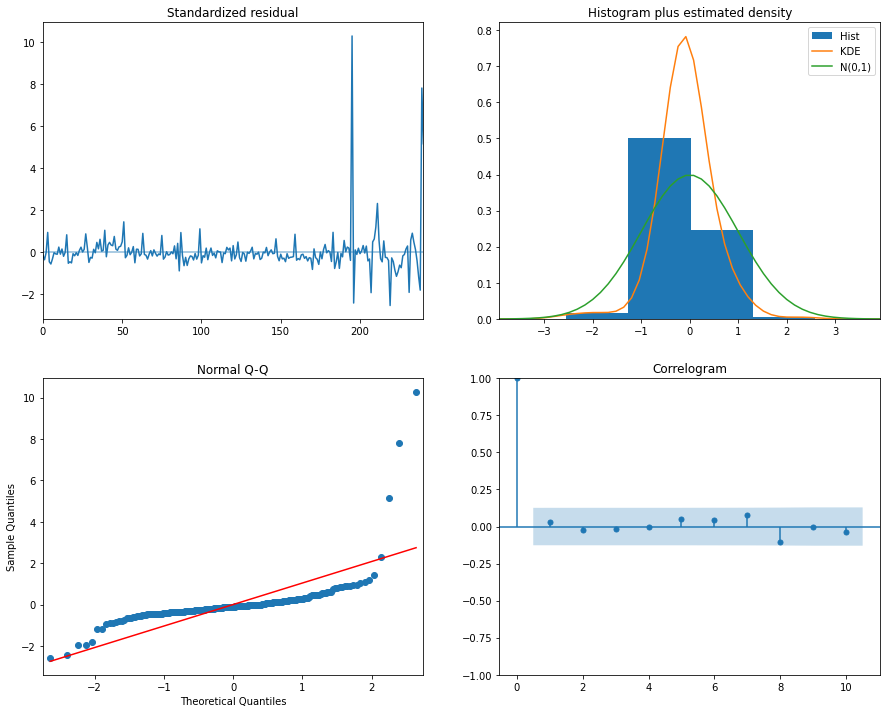

STARTED TO CONDUCT GRID SEARCHING FOR AUSTRALIA 

STARTED TO CONDUCT CROSS-VALIDATION FOR AUSTRALIA 

Best Models from Cross-validation is  ARIMA(0,1,2)(0,1,2)[12] intercept 



,date,total,american_samoa,australia,europe,new_zealand,usa,other_countries,cruise_ships,stringency_index,covid,samoa_flights,samoa_hotel,samoa_travel
0,2002-08-01,8260.0,2877.0,1115.0,429.0,2035.0,933.0,871.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2002-09-01,6708.0,2119.0,972.0,372.0,1879.0,612.0,754.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002-10-01,5737.0,1892.0,737.0,468.0,1492.0,577.0,571.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2002-11-01,6653.0,2530.0,864.0,393.0,1675.0,483.0,708.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2002-12-01,13042.0,4678.0,1918.0,272.0,4401.0,1007.0,766.0,0.0,0.0,0.0,0.0,0.0,0.0


training size : 242, testing size : 0
THE BENCHMARK EVALUATION FOR EUROPE 

STARTED TO CONDUCT STEPWISE SEARCHING FOR EUROPE 

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  242
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -250.063
Date:                              Sat, 10 Jun 2023   AIC                            518.127
Time:                                      01:30:56   BIC                            549.490
Sample:                                           0   HQIC                           530.763
                                              - 242                                         
Covariance Type:                                opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

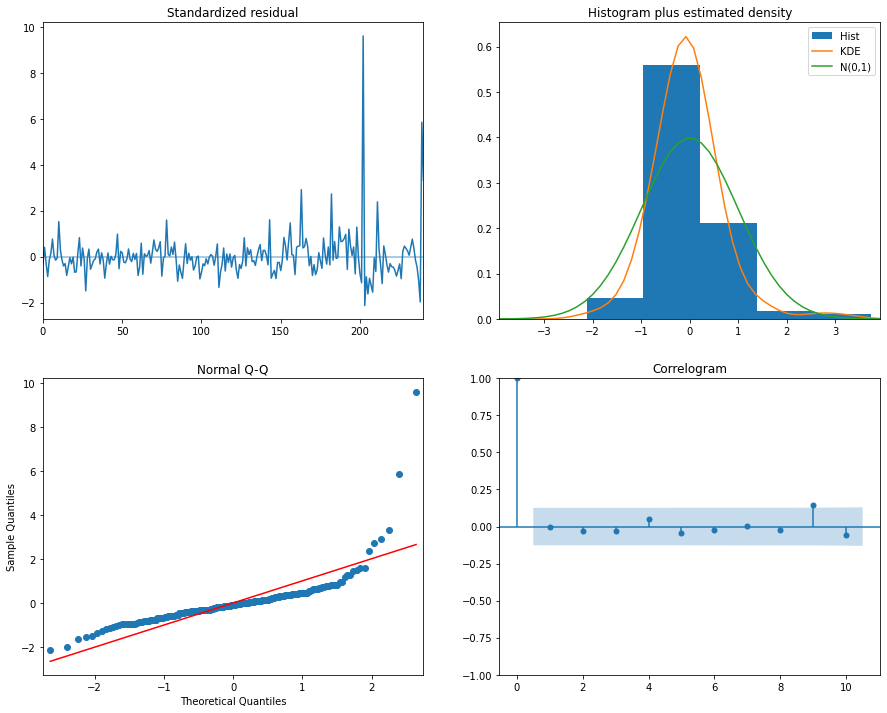

STARTED TO CONDUCT GRID SEARCHING FOR EUROPE 

STARTED TO CONDUCT CROSS-VALIDATION FOR EUROPE 

Best Models from Cross-validation is  ARIMA(1,0,2)(0,1,1)[12] intercept 



,date,total,american_samoa,australia,europe,new_zealand,usa,other_countries,cruise_ships,stringency_index,covid,samoa_flights,samoa_hotel,samoa_travel
0,2002-08-01,8260.0,2877.0,1115.0,429.0,2035.0,933.0,871.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2002-09-01,6708.0,2119.0,972.0,372.0,1879.0,612.0,754.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002-10-01,5737.0,1892.0,737.0,468.0,1492.0,577.0,571.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2002-11-01,6653.0,2530.0,864.0,393.0,1675.0,483.0,708.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2002-12-01,13042.0,4678.0,1918.0,272.0,4401.0,1007.0,766.0,0.0,0.0,0.0,0.0,0.0,0.0


training size : 242, testing size : 0
THE BENCHMARK EVALUATION FOR NEW_ZEALAND 

STARTED TO CONDUCT STEPWISE SEARCHING FOR NEW_ZEALAND 

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  242
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -309.469
Date:                                 Sat, 10 Jun 2023   AIC                            640.938
Time:                                         01:37:42   BIC                            679.271
Sample:                                              0   HQIC                           656.382
                                                 - 242                                         
Covariance Type:                                   opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
----------

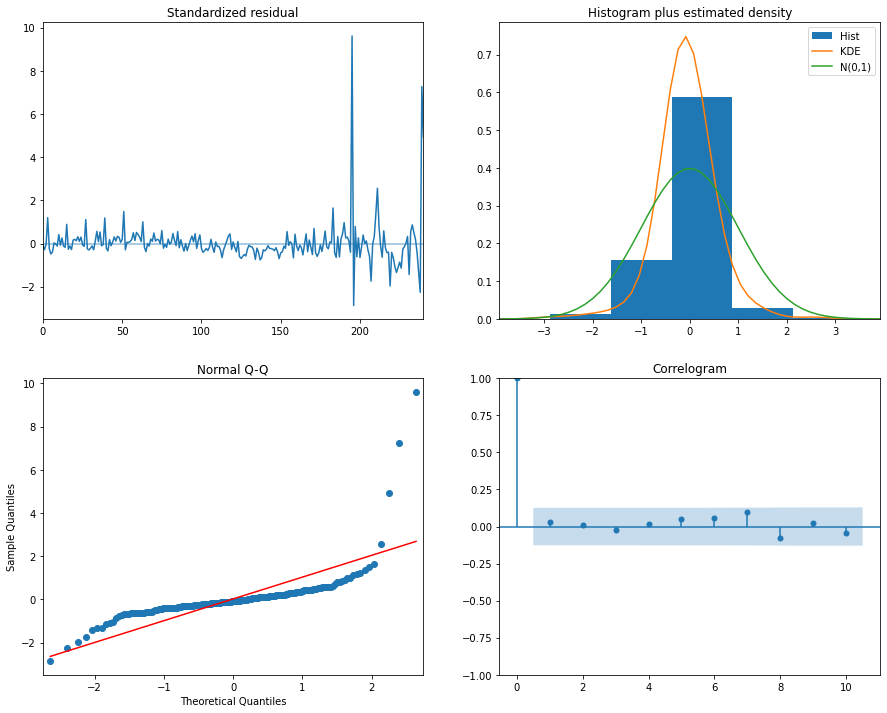

STARTED TO CONDUCT GRID SEARCHING FOR NEW_ZEALAND 

STARTED TO CONDUCT CROSS-VALIDATION FOR NEW_ZEALAND 

Best Models from Cross-validation is  ARIMA(0,1,2)(1,1,1)[12] intercept 



,date,total,american_samoa,australia,europe,new_zealand,usa,other_countries,cruise_ships,stringency_index,covid,samoa_flights,samoa_hotel,samoa_travel
0,2002-08-01,8260.0,2877.0,1115.0,429.0,2035.0,933.0,871.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2002-09-01,6708.0,2119.0,972.0,372.0,1879.0,612.0,754.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002-10-01,5737.0,1892.0,737.0,468.0,1492.0,577.0,571.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2002-11-01,6653.0,2530.0,864.0,393.0,1675.0,483.0,708.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2002-12-01,13042.0,4678.0,1918.0,272.0,4401.0,1007.0,766.0,0.0,0.0,0.0,0.0,0.0,0.0


training size : 242, testing size : 0
THE BENCHMARK EVALUATION FOR USA 

STARTED TO CONDUCT STEPWISE SEARCHING FOR USA 

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  242
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -264.252
Date:                                 Sat, 10 Jun 2023   AIC                            548.504
Time:                                         01:45:06   BIC                            583.351
Sample:                                              0   HQIC                           562.543
                                                 - 242                                         
Covariance Type:                                   opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------

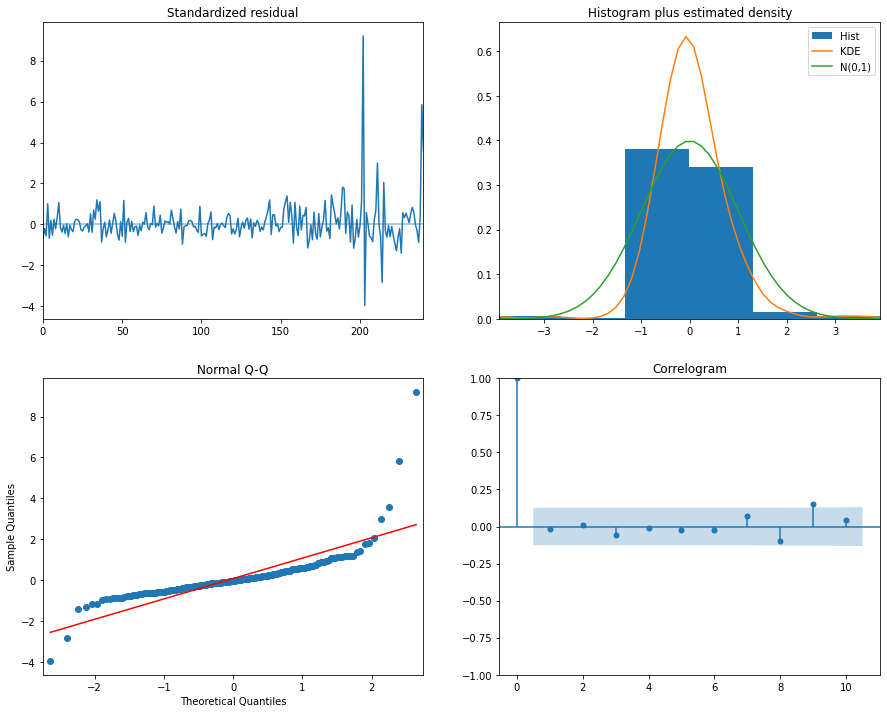

STARTED TO CONDUCT GRID SEARCHING FOR USA 

STARTED TO CONDUCT CROSS-VALIDATION FOR USA 

Best Models from Cross-validation is  ARIMA(2,1,1)(2,1,2)[12] intercept 



,date,total,american_samoa,australia,europe,new_zealand,usa,other_countries,cruise_ships,stringency_index,covid,samoa_flights,samoa_hotel,samoa_travel
0,2002-08-01,8260.0,2877.0,1115.0,429.0,2035.0,933.0,871.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2002-09-01,6708.0,2119.0,972.0,372.0,1879.0,612.0,754.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002-10-01,5737.0,1892.0,737.0,468.0,1492.0,577.0,571.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2002-11-01,6653.0,2530.0,864.0,393.0,1675.0,483.0,708.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2002-12-01,13042.0,4678.0,1918.0,272.0,4401.0,1007.0,766.0,0.0,0.0,0.0,0.0,0.0,0.0


training size : 242, testing size : 0
THE BENCHMARK EVALUATION FOR OTHER_COUNTRIES 

STARTED TO CONDUCT STEPWISE SEARCHING FOR OTHER_COUNTRIES 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -297.041
Date:                Sat, 10 Jun 2023   AIC                            608.081
Time:                        01:51:37   BIC                            632.475
Sample:                             0   HQIC                           617.909
                                - 242                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.0079      0.009      0.905    

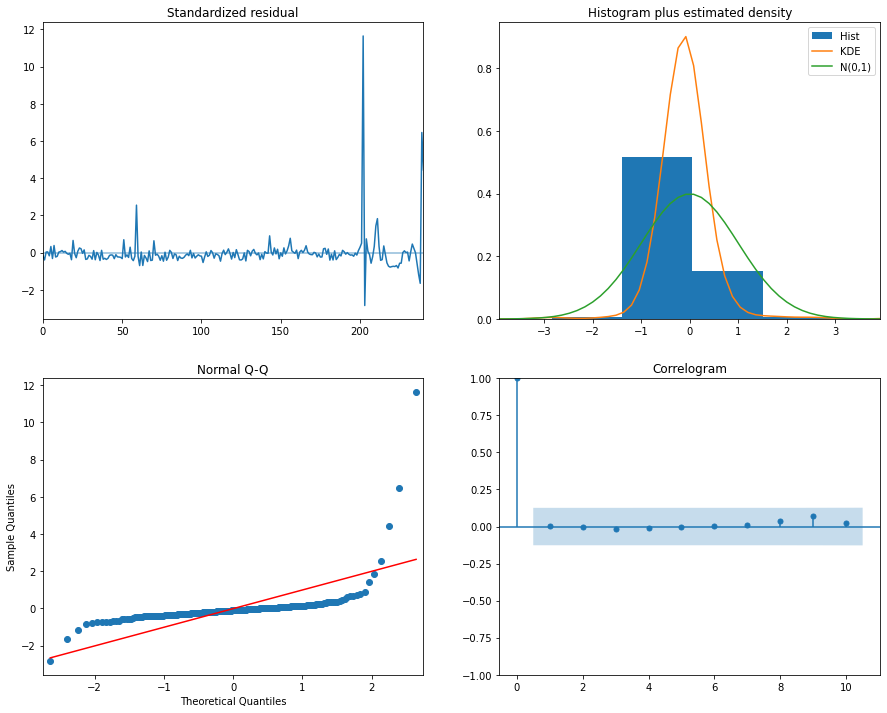

STARTED TO CONDUCT GRID SEARCHING FOR OTHER_COUNTRIES 



In [12]:
y_vars = ["american_samoa", "australia", "europe",
          "new_zealand", "usa", "other_countries"]

countries = run_sarimax(country="samoa", y_vars=y_vars, method="scaledlogit")

In [13]:
incl_cols = [col for col in countries.columns if col.endswith("pred")]
calculate_evaluation(countries["total"], countries[incl_cols].mean(axis=1))

{'MSE': 78087015.40740225,
 'RMSE': 8836.685770547816,
 'MAE': 7910.180901303855,
 'SMAPE': 148.9854448258599}